In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import os

np.random.seed(1)
torch.manual_seed(1)

In [5]:
# create dataset
n_grid = 100
x = np.linspace(-1,1,num=n_grid)
y = np.linspace(-1,1,num=n_grid)
X, Y = np.meshgrid(x,y)
data = np.transpose(np.array([X.reshape(-1,), Y.reshape(-1,)]))
delta = 0.000
truth = data[:,0]**2 + data[:,1]**2 + delta*data[:,0]*data[:,1]

deviate = np.mean((delta*data[:,0]*data[:,1])**2)
print(deviate)

data = torch.tensor(data, dtype=torch.float, requires_grad=True)
truth = torch.tensor(truth, dtype=torch.float, requires_grad=True)

0.0


In [6]:
alpha = 0.0

class NN1(nn.Module):
    def __init__(self, w=10):
        super(NN1, self).__init__()
        self.l1 = nn.Linear(1,w)
        self.l2 = nn.Linear(w,w)
        self.l3 = nn.Linear(w,1)
        
    def forward(self, x):
        f = nn.LeakyReLU(alpha)
        self.x1 = f(self.l1(x))
        self.x2 = f(self.l2(self.x1))
        self.x3 = self.l3(self.x2)
        return self.x3


class NN2(nn.Module):
    def __init__(self, w=10):
        super(NN2, self).__init__()
        self.nnx = NN1(w=w)
        self.nny = NN1(w=w)
        
    def forward(self, x):
        return self.nnx(x[:,[0]]) + self.nny(x[:,[1]])

In [7]:
n_train = data.shape[0]

ws = [10,20,40,80]
loss_w = []

for w in ws:
    print("w={}".format(w))
    model = NN2(w=w)
    #epochs = 10000
    epochs = 50000
    switch_epoch = 10000
    log = 100
    lr = 1e-2
    optimizer = optim.Adam(model.parameters(), lr = lr, eps=1e-8, betas=(0.9,0.999))
    losses = []
    best_loss = 1000

    for epoch in range(epochs):
        if epoch < epochs-1:
            batch_size = 10000
        else:
            batch_size = n_train

        if (epoch+1) % switch_epoch == 0:    
            for opt_param in optimizer.param_groups:
                lr = lr * 0.3
                opt_param['lr'] = lr
        model.train()
        optimizer.zero_grad()

        choices = np.random.choice(n_train, batch_size, replace=False)
        inputs = data[choices]
        labels = truth[choices]
        outputs = model(inputs)[:,0]

        loss = torch.mean((outputs-labels)**2)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().numpy())
        
        if loss < best_loss:
            best_loss = loss

        if epoch%log == 0:
            print('Epoch:  %d | loss %.12f ' %(epoch, loss))
    
    loss_w.append(best_loss.detach().numpy())

w=10
Epoch:  0 | loss 0.836628496647 
Epoch:  100 | loss 0.007644993719 
Epoch:  200 | loss 0.000585365866 
Epoch:  300 | loss 0.000331308402 
Epoch:  400 | loss 0.000236006978 
Epoch:  500 | loss 0.000181742042 
Epoch:  600 | loss 0.000154117748 
Epoch:  700 | loss 0.000141695447 
Epoch:  800 | loss 0.000131782130 
Epoch:  900 | loss 0.000125765102 
Epoch:  1000 | loss 0.000121201170 
Epoch:  1100 | loss 0.000115642142 
Epoch:  1200 | loss 0.000111456058 
Epoch:  1300 | loss 0.000108031119 
Epoch:  1400 | loss 0.000105090025 
Epoch:  1500 | loss 0.000102163896 
Epoch:  1600 | loss 0.000099616518 
Epoch:  1700 | loss 0.000095821371 
Epoch:  1800 | loss 0.000100123405 
Epoch:  1900 | loss 0.000089879359 
Epoch:  2000 | loss 0.000088001747 
Epoch:  2100 | loss 0.000086001892 
Epoch:  2200 | loss 0.000084211366 
Epoch:  2300 | loss 0.000082701066 
Epoch:  2400 | loss 0.000080226055 
Epoch:  2500 | loss 0.000095739735 
Epoch:  2600 | loss 0.000076908946 
Epoch:  2700 | loss 0.000073500392 

Epoch:  22500 | loss 0.000029990140 
Epoch:  22600 | loss 0.000030063462 
Epoch:  22700 | loss 0.000029965717 
Epoch:  22800 | loss 0.000029982575 
Epoch:  22900 | loss 0.000029942057 
Epoch:  23000 | loss 0.000029929921 
Epoch:  23100 | loss 0.000029918898 
Epoch:  23200 | loss 0.000029907336 
Epoch:  23300 | loss 0.000029897901 
Epoch:  23400 | loss 0.000029885106 
Epoch:  23500 | loss 0.000034722270 
Epoch:  23600 | loss 0.000029864117 
Epoch:  23700 | loss 0.000029853552 
Epoch:  23800 | loss 0.000029843026 
Epoch:  23900 | loss 0.000029837796 
Epoch:  24000 | loss 0.000029822091 
Epoch:  24100 | loss 0.000029818306 
Epoch:  24200 | loss 0.000029801995 
Epoch:  24300 | loss 0.000032119631 
Epoch:  24400 | loss 0.000029782450 
Epoch:  24500 | loss 0.000029772731 
Epoch:  24600 | loss 0.000029822559 
Epoch:  24700 | loss 0.000029753643 
Epoch:  24800 | loss 0.000029826373 
Epoch:  24900 | loss 0.000029734740 
Epoch:  25000 | loss 0.000029779414 
Epoch:  25100 | loss 0.000029593159 
E

Epoch:  44700 | loss 0.000023716526 
Epoch:  44800 | loss 0.000023714128 
Epoch:  44900 | loss 0.000023725930 
Epoch:  45000 | loss 0.000023709399 
Epoch:  45100 | loss 0.000023707200 
Epoch:  45200 | loss 0.000023707005 
Epoch:  45300 | loss 0.000023702813 
Epoch:  45400 | loss 0.000023700763 
Epoch:  45500 | loss 0.000023705777 
Epoch:  45600 | loss 0.000023696764 
Epoch:  45700 | loss 0.000023694896 
Epoch:  45800 | loss 0.000023712384 
Epoch:  45900 | loss 0.000023691262 
Epoch:  46000 | loss 0.000023690260 
Epoch:  46100 | loss 0.000023687888 
Epoch:  46200 | loss 0.000023686262 
Epoch:  46300 | loss 0.000023689521 
Epoch:  46400 | loss 0.000023683113 
Epoch:  46500 | loss 0.000023681650 
Epoch:  46600 | loss 0.000023680117 
Epoch:  46700 | loss 0.000023678655 
Epoch:  46800 | loss 0.000023677521 
Epoch:  46900 | loss 0.000023685070 
Epoch:  47000 | loss 0.000023674505 
Epoch:  47100 | loss 0.000023676392 
Epoch:  47200 | loss 0.000023671964 
Epoch:  47300 | loss 0.000023673178 
E

Epoch:  17200 | loss 0.000005375339 
Epoch:  17300 | loss 0.000005232024 
Epoch:  17400 | loss 0.000005230536 
Epoch:  17500 | loss 0.000005210022 
Epoch:  17600 | loss 0.000005488841 
Epoch:  17700 | loss 0.000005189037 
Epoch:  17800 | loss 0.000005051216 
Epoch:  17900 | loss 0.000004887507 
Epoch:  18000 | loss 0.000008698140 
Epoch:  18100 | loss 0.000004813783 
Epoch:  18200 | loss 0.000004779560 
Epoch:  18300 | loss 0.000004798973 
Epoch:  18400 | loss 0.000004732244 
Epoch:  18500 | loss 0.000008466772 
Epoch:  18600 | loss 0.000004696705 
Epoch:  18700 | loss 0.000017787099 
Epoch:  18800 | loss 0.000004665332 
Epoch:  18900 | loss 0.000006115585 
Epoch:  19000 | loss 0.000004645375 
Epoch:  19100 | loss 0.000004653587 
Epoch:  19200 | loss 0.000004620265 
Epoch:  19300 | loss 0.000004606664 
Epoch:  19400 | loss 0.000004603060 
Epoch:  19500 | loss 0.000004581465 
Epoch:  19600 | loss 0.000004736905 
Epoch:  19700 | loss 0.000004566225 
Epoch:  19800 | loss 0.000005657287 
E

Epoch:  39400 | loss 0.000004190136 
Epoch:  39500 | loss 0.000004671851 
Epoch:  39600 | loss 0.000004173869 
Epoch:  39700 | loss 0.000004172914 
Epoch:  39800 | loss 0.000004172197 
Epoch:  39900 | loss 0.000004174572 
Epoch:  40000 | loss 0.000004170901 
Epoch:  40100 | loss 0.000004170689 
Epoch:  40200 | loss 0.000004170437 
Epoch:  40300 | loss 0.000004170224 
Epoch:  40400 | loss 0.000004169959 
Epoch:  40500 | loss 0.000004169721 
Epoch:  40600 | loss 0.000004169456 
Epoch:  40700 | loss 0.000004169201 
Epoch:  40800 | loss 0.000004168870 
Epoch:  40900 | loss 0.000004168568 
Epoch:  41000 | loss 0.000004168225 
Epoch:  41100 | loss 0.000004167899 
Epoch:  41200 | loss 0.000004167615 
Epoch:  41300 | loss 0.000004167169 
Epoch:  41400 | loss 0.000004166833 
Epoch:  41500 | loss 0.000004166458 
Epoch:  41600 | loss 0.000004166068 
Epoch:  41700 | loss 0.000004165668 
Epoch:  41800 | loss 0.000004165190 
Epoch:  41900 | loss 0.000004164676 
Epoch:  42000 | loss 0.000004164221 
E

Epoch:  11900 | loss 0.000001924665 
Epoch:  12000 | loss 0.000001909991 
Epoch:  12100 | loss 0.000001894425 
Epoch:  12200 | loss 0.000001879175 
Epoch:  12300 | loss 0.000001864101 
Epoch:  12400 | loss 0.000005696211 
Epoch:  12500 | loss 0.000001849491 
Epoch:  12600 | loss 0.000001829609 
Epoch:  12700 | loss 0.000001969022 
Epoch:  12800 | loss 0.000001809910 
Epoch:  12900 | loss 0.000001989537 
Epoch:  13000 | loss 0.000001791259 
Epoch:  13100 | loss 0.000001892592 
Epoch:  13200 | loss 0.000001774160 
Epoch:  13300 | loss 0.000002124150 
Epoch:  13400 | loss 0.000001758774 
Epoch:  13500 | loss 0.000003032912 
Epoch:  13600 | loss 0.000001744630 
Epoch:  13700 | loss 0.000027479649 
Epoch:  13800 | loss 0.000001733452 
Epoch:  13900 | loss 0.000001727581 
Epoch:  14000 | loss 0.000001720429 
Epoch:  14100 | loss 0.000001710005 
Epoch:  14200 | loss 0.000001984678 
Epoch:  14300 | loss 0.000001698720 
Epoch:  14400 | loss 0.000001709577 
Epoch:  14500 | loss 0.000001687457 
E

Epoch:  34100 | loss 0.000001282347 
Epoch:  34200 | loss 0.000001373089 
Epoch:  34300 | loss 0.000001280631 
Epoch:  34400 | loss 0.000001454812 
Epoch:  34500 | loss 0.000001278980 
Epoch:  34600 | loss 0.000001278352 
Epoch:  34700 | loss 0.000001277327 
Epoch:  34800 | loss 0.000001365659 
Epoch:  34900 | loss 0.000001275743 
Epoch:  35000 | loss 0.000001291939 
Epoch:  35100 | loss 0.000001274146 
Epoch:  35200 | loss 0.000001287270 
Epoch:  35300 | loss 0.000001272587 
Epoch:  35400 | loss 0.000001282441 
Epoch:  35500 | loss 0.000001271091 
Epoch:  35600 | loss 0.000001273185 
Epoch:  35700 | loss 0.000001269608 
Epoch:  35800 | loss 0.000001269488 
Epoch:  35900 | loss 0.000001268195 
Epoch:  36000 | loss 0.000001272861 
Epoch:  36100 | loss 0.000001266785 
Epoch:  36200 | loss 0.000001270500 
Epoch:  36300 | loss 0.000001265428 
Epoch:  36400 | loss 0.000001289251 
Epoch:  36500 | loss 0.000001264134 
Epoch:  36600 | loss 0.000001263881 
Epoch:  36700 | loss 0.000001262832 
E

Epoch:  6500 | loss 0.000001951355 
Epoch:  6600 | loss 0.000326099194 
Epoch:  6700 | loss 0.000002095173 
Epoch:  6800 | loss 0.000001812294 
Epoch:  6900 | loss 0.000036614896 
Epoch:  7000 | loss 0.000002073476 
Epoch:  7100 | loss 0.000001779607 
Epoch:  7200 | loss 0.001222292311 
Epoch:  7300 | loss 0.000006814177 
Epoch:  7400 | loss 0.000004893393 
Epoch:  7500 | loss 0.000004319325 
Epoch:  7600 | loss 0.000003986888 
Epoch:  7700 | loss 0.000003777078 
Epoch:  7800 | loss 0.000003636165 
Epoch:  7900 | loss 0.000003517308 
Epoch:  8000 | loss 0.000003085129 
Epoch:  8100 | loss 0.000002841011 
Epoch:  8200 | loss 0.000002687887 
Epoch:  8300 | loss 0.000002473971 
Epoch:  8400 | loss 0.000002314799 
Epoch:  8500 | loss 0.000002197440 
Epoch:  8600 | loss 0.000002112535 
Epoch:  8700 | loss 0.000002042295 
Epoch:  8800 | loss 0.000001985730 
Epoch:  8900 | loss 0.000003417200 
Epoch:  9000 | loss 0.000001998259 
Epoch:  9100 | loss 0.000001904785 
Epoch:  9200 | loss 0.000006

Epoch:  28800 | loss 0.000000354516 
Epoch:  28900 | loss 0.000000311103 
Epoch:  29000 | loss 0.000000310910 
Epoch:  29100 | loss 0.000000310330 
Epoch:  29200 | loss 0.000000721460 
Epoch:  29300 | loss 0.000000309642 
Epoch:  29400 | loss 0.000000419507 
Epoch:  29500 | loss 0.000000308876 
Epoch:  29600 | loss 0.000001556041 
Epoch:  29700 | loss 0.000000308291 
Epoch:  29800 | loss 0.000000592346 
Epoch:  29900 | loss 0.000000307556 
Epoch:  30000 | loss 0.000000322957 
Epoch:  30100 | loss 0.000000306751 
Epoch:  30200 | loss 0.000000306536 
Epoch:  30300 | loss 0.000000306345 
Epoch:  30400 | loss 0.000000306149 
Epoch:  30500 | loss 0.000000305977 
Epoch:  30600 | loss 0.000000305785 
Epoch:  30700 | loss 0.000000305611 
Epoch:  30800 | loss 0.000000305420 
Epoch:  30900 | loss 0.000000305238 
Epoch:  31000 | loss 0.000000305059 
Epoch:  31100 | loss 0.000000304877 
Epoch:  31200 | loss 0.000000304670 
Epoch:  31300 | loss 0.000000304481 
Epoch:  31400 | loss 0.000000304283 
E

In [430]:
np.save('./additivity_results/{}'.format(delta), loss_w)

In [431]:
loss_w = np.load('./additivity_results/{}.npy'.format(delta))

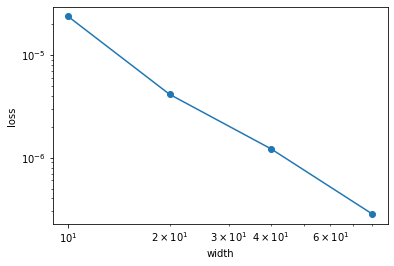

In [8]:
ws = [10,20,40,80]
plt.plot(ws, loss_w, marker="o")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('width')
plt.ylabel('loss',fontsize=10)
log_ws = np.log(ws)
log_loss = np.log(loss_w)

In [21]:
start_id = 0
end_id = 3

slope = (np.log(loss_w[start_id])-np.log(loss_w[end_id]))/(np.log(ws[start_id])-np.log(ws[end_id]))
slope

-2.130211510116921

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy

reg = LinearRegression().fit(log_ws[:,np.newaxis], log_loss)
eps_max = np.min(loss_w)*0.999

num_sweep = 10001
eps0_sweep = np.linspace(0, eps_max, num=num_sweep)
scores = []

for i in range(num_sweep):
    score = np.abs(scipy.stats.pearsonr(log_ws, np.log(loss_w-eps0_sweep[i]))[0])
    scores.append(score)

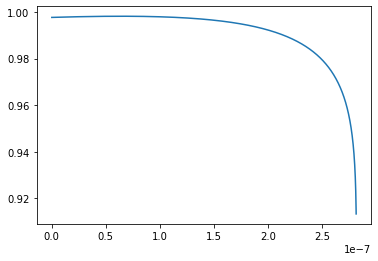

In [10]:
plt.plot(eps0_sweep, scores)

In [11]:
max_id = np.argmax(scores)
eps0 = eps0_sweep[max_id]
reg.fit(log_ws[:,np.newaxis], np.log(loss_w-eps0))
alpha = reg.coef_[0]
A = np.e**reg.intercept_
print(max_id)
print(eps0)
print(alpha)
print(A)
#[eps0, A, alpha]

2271
6.393940508248476e-08
-2.209192685113036
0.003565715915756688


In [12]:
from scipy.optimize import minimize

def f(x):
    eps0 = x[0]
    A = x[1]
    alpha = x[2]
    return np.mean((loss_w-(A*ws**alpha+eps0))**2)

x0 = np.array([eps0, A, alpha])
sol = minimize(f, x0, tol=1e-16)
sol

      fun: 2.2213024996055152e-14
 hess_inv: array([[ 1.60272441e+00,  1.35903368e+04, -6.79134522e+05],
       [ 1.35903368e+04,  2.28644882e+08, -1.11283971e+10],
       [-6.79134522e+05, -1.11283971e+10,  5.42712598e+11]])
      jac: array([-1.13834817e-10, -2.50957776e-13, -5.37732747e-15])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 372
      nit: 51
     njev: 90
   status: 2
  success: False
        x: array([ 3.27677732e-07,  9.07975760e-03, -2.59048122e+00])

In [437]:
np.save('./additivity_results/{}_dict.npy'.format(delta), sol.x)

In [438]:
np.load('./additivity_results/{}_dict.npy'.format(delta))

array([ 3.14608724e-06,  1.99858136e-03, -1.65796907e+00])

Text(0.5, 1.0, 'ReLU network: slope=4/d=3.29, d=1.22')

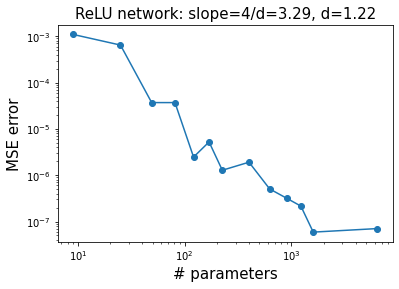

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('./additivity_results/relu_noseq.npy')
ws = data[0]
error = data[1]

plt.plot(ws**2, error, marker="o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('# parameters',fontsize=15)
plt.ylabel('MSE error',fontsize=15)
plt.title("ReLU network: slope=4/d=3.29, d=1.22",fontsize=15)

In [15]:
start_id = 1
end_id = -1

slope = (np.log(error[start_id])-np.log(error[end_id]))/(np.log(ws[start_id])-np.log(ws[end_id]))
slope

-3.29132061579563